In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

### Churn Prediction Dataset

In [2]:
#reading csv file 
data = pd.read_csv('churn_prediction.csv')

In [3]:
#first look at the data
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
#getting the shape of data
data.shape

(28382, 21)

In [5]:
#features in data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [6]:
#getting the data types for each feature
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

### Age of Customers

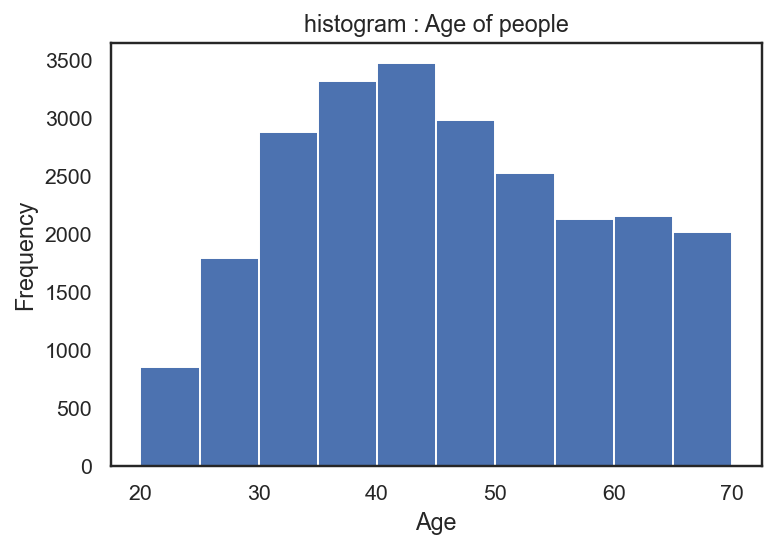

In [18]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(data['age'])
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people")
plt.show()

* A __Histogram__ visualises the distribution of data over a continuous interval. 
* Each bar in a histogram represents the tabulated __frequency__ at each __interval/bin__. 
* In simple words __height (y-axis)__ represents the __frequency__ for respective __bin (interval)__
* Most Cusotmers lie in the age between 40-50

In [39]:
age = data['age']

# calculating points of standard deviation
a_mean = age.mean()
a_median = age.median()
a_stdev = age.mean()- age.std(), age.mean()+ age.std() 

# checking
a_mean, a_median, a_stdev

(48.208336269466564, 46.0, (30.401172896500047, 66.01549964243308))

* Mean value of age is 48.208336269466564
* Median value for age is 46.0
* Spread for first standard deviation is (30.40117289650014, 66.01549964243299)

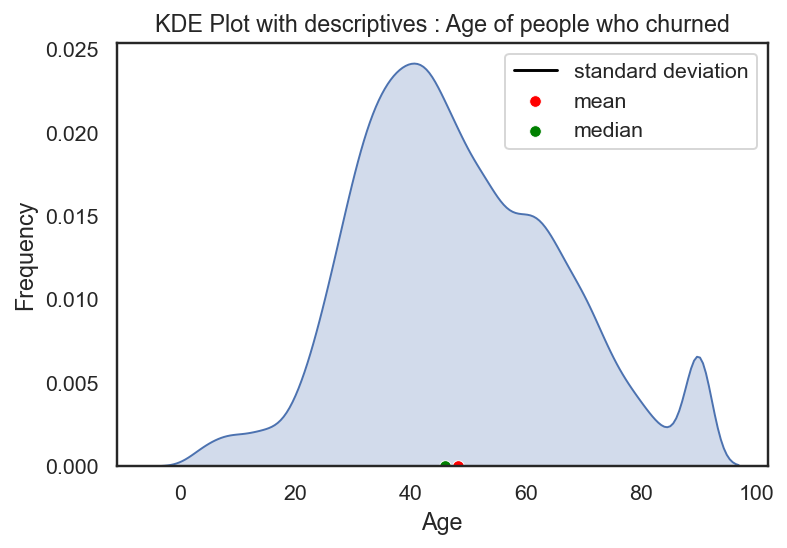

In [40]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(age, shade = True)
sns.scatterplot( [a_mean], [0], color='red', label='mean')
sns.scatterplot( [a_median], [0], color='green', label='median')

sns.lineplot( a_stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Age of people who churned")
plt.show()

* KDE indicates that age of Customers follow a distribution which is similar to __Normal Distribution__
* Suprisingly there are more than expected __Older customers__  in our dataset

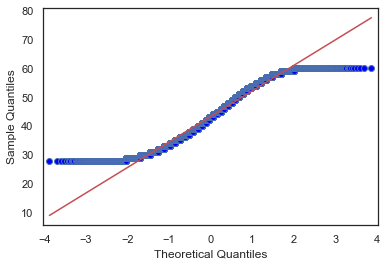

In [38]:
#qq plot explain
sm.qqplot(age, line='s') 
py.show() 

* __Larger values__ are __not as large/extreme__ as expected from a Normal Distribution
* __Smaller values__ are __not as smaller/extreme__ as expected from a Normal Distribution

In [0]:
data['age'].skew()

0.33058929557517264

* __Skewness__ is around 0.33
* Age of Cusotmers follows a __Normal__ like Distribution 

In [0]:
data['age'].kurtosis()

-0.16866785691275865

* __Kurtosis Value__ is also close to Zero.
* This means tails are not as __dense__ as compared to Normal Distribution.
* There are less values available along the tails.

### Vintage

In [0]:
# calculating measures
v_mean = data['vintage'].mean()
v_median = data['vintage'].median()
v_mode = data['vintage'].mode()


# checking
v_mean, v_median, v_mode

(2091.1441054189277, 2154.0, 0    2251
 1    2260
 dtype: int64)

* __Mean value__ of vintage is 2091.1441054189277
* __Median value__ for vintage is 2154.0
* __Mode value__ for  vintage is  2251 and 2260. Both of them have same frquency

In [0]:
print(data[data['vintage']==2251].shape[0])
print(data[data['vintage']==2260].shape[0])


69
69


* The frequency for 2251 and 2260 is 69
* __Both__ of them qualify to be the __mode__ value (most frequent value) for the dataset.

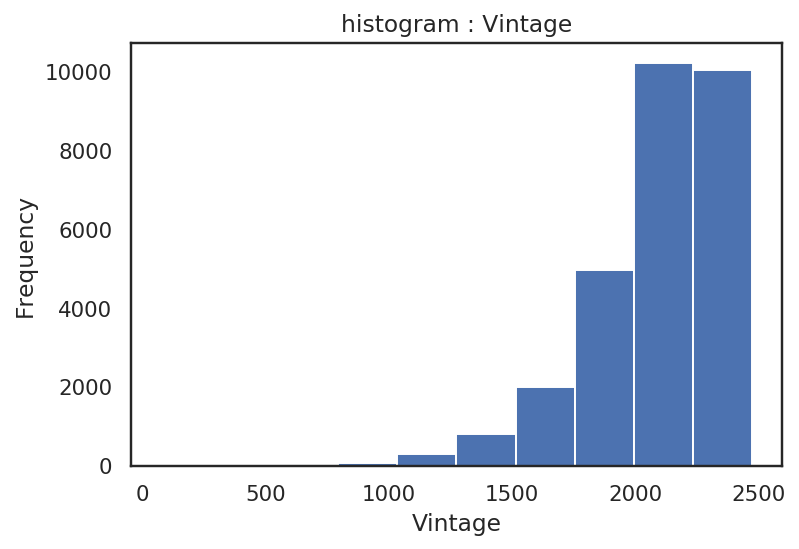

In [0]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(data['vintage'])
plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("histogram : Vintage")
plt.show()

* Clearly Histogram indicates that distribution is __Left Skewed__ for Vinatage.
* More customers have interaction with the bank from More days in compare to the customer who are new for the bank



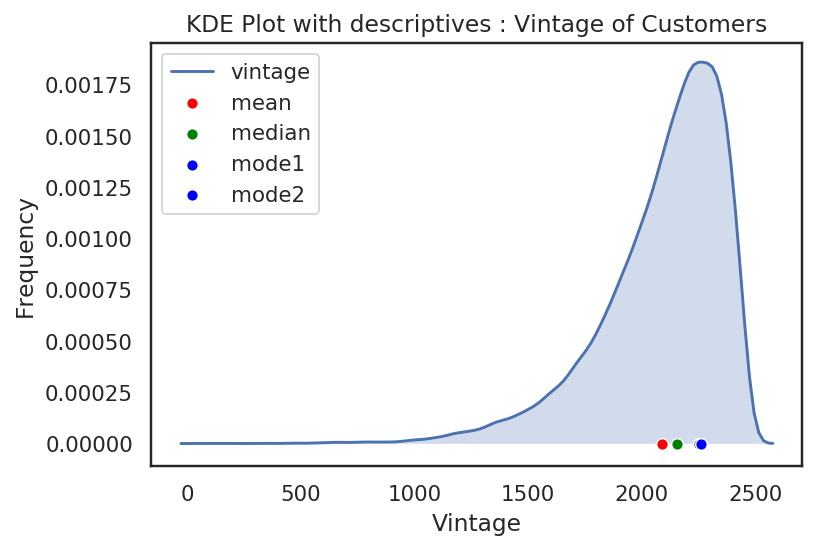

In [0]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(data['vintage'], shade = True)
sns.scatterplot( [v_mean], [0], color='red', label='mean')
sns.scatterplot( [v_median], [0], color='green', label='median')
sns.scatterplot( [v_mode[0]],[0], color='blue', label='mode1')
sns.scatterplot( [v_mode[1]],[0], color='blue', label='mode2')


plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Vintage of Customers")
plt.show()

* KDE indicates that Vinatge of Customers follow a distribution which is __Left Skewed__.
* __Mean and Median__ are __higher__ than the __Mode__ Value.
* tail on the __left__ side of the distribution is __longer__.

In [0]:
#explain Skewness
data['vintage'].skew()

-1.3889357082821185

* __Negative Skewness__ indicates __Negatively skewed__
* __Negatively skewed__ is also known as __Left Skewed Distribution__



In [0]:
#Kurtosis Positive
data['vintage'].kurtosis()

2.7234245375227926

* __Positive Kurtosis__ indicates __Leptokurtic Distribution__
* Distribution is __longer__ in compare to Normal Distribution 
* High presence of __extreme values__

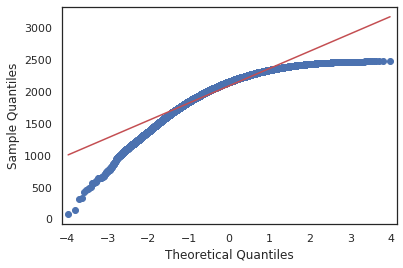

In [0]:
#qq plot explain
sm.qqplot(data['vintage'], line='s') 
py.show() 

* Larger values are not as large as expected from a Normal Distribution
* Smaller values are lesser in magnitude as compared to a normal distribution